In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv",sep=",")
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [3]:
del df["Index"] # zmazem stlpec index 

In [4]:
bmi = []
for index, row in df.iterrows():
        bmi.append(round( df.iloc[index,2]/np.square(df.iloc[index,1]) *10000,1)) #BMI = m/h²
df["BMI"] = bmi # pridavam novy stlpec BMI

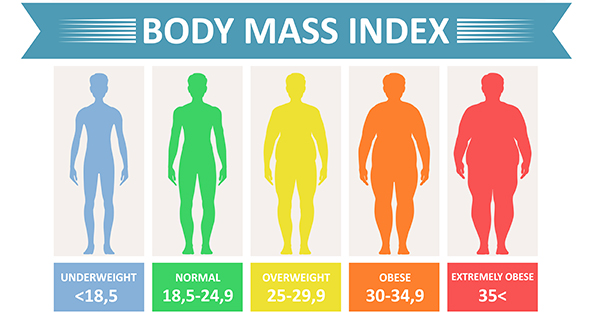

In [5]:
from IPython.display import Image
Image("img_bmi.jpg")

In [6]:
categories = []
for index, row in df.iterrows():
    if ( df.iloc[index,3] <= 18.5 ):
        categories.append("1") # underweight = podvaha
        
    elif ( 18.5 < df.iloc[index,3] <= 24.9 ):
        categories.append("2") # normal = normalna vaha
        
    elif ( 25 <= df.iloc[index,3] <= 29.9 ):
        categories.append("3") # overweight = nadvaha
    
    elif ( 30 <= df.iloc[index,3] <= 34.9 ):
        categories.append("4") # obese = obezny
        
    elif ( df.iloc[index,3] >= 35 ):
        categories.append("5") # extremely obese = extremne obezny
df["Category"] = categories 

In [7]:
df.head()

,Gender,Height,Weight,BMI,Category
0,Male,174,96,31.7,4
1,Male,189,87,24.4,2
2,Female,185,110,32.1,4
3,Female,195,104,27.4,3
4,Male,149,61,27.5,3


In [8]:
df.sort_values(by=['BMI'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
df

,Gender,Height,Weight,BMI,Category
0,Male,198,50,12.8,1
1,Female,198,50,12.8,1
2,Female,196,50,13.0,1
3,Female,190,50,13.9,1
4,Male,190,50,13.9,1
...,...,...,...,...,...
495,Male,140,146,74.5,5
496,Female,140,146,74.5,5
497,Male,145,160,76.1,5
498,Male,140,152,77.6,5


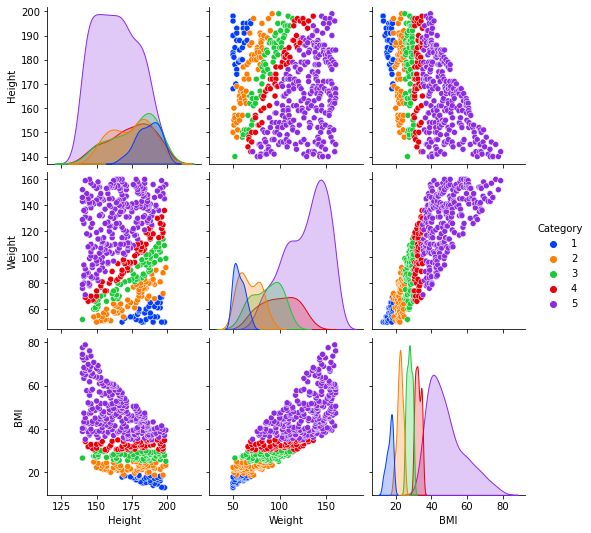

In [10]:
import seaborn as sns
sns.pairplot(data=df, hue='Category', palette= "bright")

In [11]:
df.Category.value_counts()

5    268
3     70
4     64
2     63
1     35
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

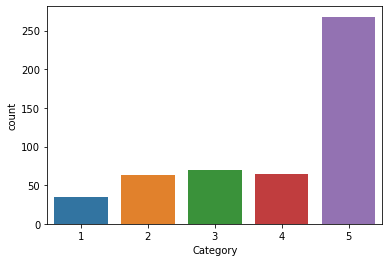

In [12]:
sns.countplot(x='Category',data=df)